# 1.  Linear-Regression Model 
using scikit-learning

In [61]:
%matplotlib inline

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [63]:
random_data = np.random.random((20,2))

In [64]:
random_data

array([[0.4773286 , 0.21572477],
       [0.08375085, 0.09802597],
       [0.1419077 , 0.31546047],
       [0.37306676, 0.77533579],
       [0.25997184, 0.57331662],
       [0.468235  , 0.85803066],
       [0.08873294, 0.44173512],
       [0.25945433, 0.21642623],
       [0.43058742, 0.25367786],
       [0.86278481, 0.66094635],
       [0.63226084, 0.66842111],
       [0.5704923 , 0.68484718],
       [0.46166524, 0.96001477],
       [0.89398281, 0.78418262],
       [0.88547912, 0.56686726],
       [0.40921428, 0.74881646],
       [0.57095008, 0.81708899],
       [0.97468173, 0.48560948],
       [0.12223452, 0.49452472],
       [0.76064536, 0.62102467]])

In [65]:
X = random_data[:,0]

In [66]:
y = random_data[:,1]

In [67]:
def assuming_function(x):
    return 13.4*x+5+random.randint(-5,5)

In [68]:
y=[assuming_function(x) for x in X]

In [69]:
print(y)

[11.396203194704196, 8.122261330841091, 11.901563182046795, 9.999094546414144, 11.483622673647186, 13.274349001362221, 7.189021448571154, 9.476688046359946, 12.769871395673581, 17.561316411367535, 16.47229524906971, 8.64459682912484, 13.18631419804906, 12.97936963670897, 19.86542023795925, 7.483471402183113, 17.650731017116918, 19.06073520233189, 5.637942556671613, 15.192647823483256]


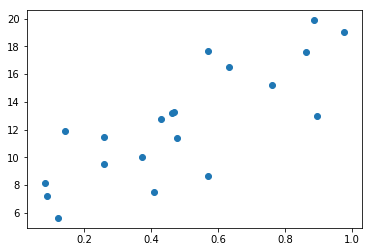

In [70]:
plt.scatter(X,y)

In [71]:
y = np.array(y)

In [72]:
print(y)

[11.39620319  8.12226133 11.90156318  9.99909455 11.48362267 13.274349
  7.18902145  9.47668805 12.7698714  17.56131641 16.47229525  8.64459683
 13.1863142  12.97936964 19.86542024  7.4834714  17.65073102 19.0607352
  5.63794256 15.19264782]


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
reg = LinearRegression().fit(X.reshape(-1,1),y)

In [75]:
reg.score(X.reshape(-1,1),y)

0.641771315156755

In [76]:
reg.coef_

array([11.76315914])

In [77]:
reg.intercept_

6.746112460858194

In [78]:
def f(x):
    return reg.coef_*x+reg.intercept_

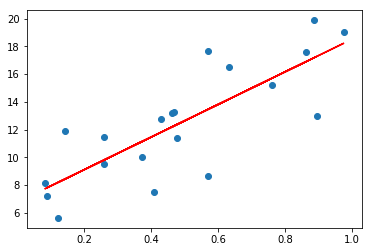

In [79]:
plt.scatter(X,y)
plt.plot(X,f(X),color='red')

In [80]:
X

array([0.4773286 , 0.08375085, 0.1419077 , 0.37306676, 0.25997184,
       0.468235  , 0.08873294, 0.25945433, 0.43058742, 0.86278481,
       0.63226084, 0.5704923 , 0.46166524, 0.89398281, 0.88547912,
       0.40921428, 0.57095008, 0.97468173, 0.12223452, 0.76064536])

In [81]:
reg.predict(X.reshape(-1,1))

array([12.3610047 ,  7.73128699,  8.41539532, 11.13455609,  9.8042026 ,
       12.25403528,  7.7898922 ,  9.79811505, 11.81118078, 16.89518744,
       14.18349733, 13.45690418, 12.17675413, 17.26217451, 17.16214429,
       11.5597652 , 13.46228906, 18.21144878,  8.18397656, 15.69370488])

# 2.  KNN model

In [82]:
def model(X,y):
    return [(Xi,yi) for Xi,yi in zip(X,y)]

In [83]:
from scipy.spatial.distance import cosine

In [84]:
def distance(x1,x2):
    return cosine(x1,x2)

In [96]:
def predict(x,k=5):
    most_similars = sorted(model(X,y),key=lambda xi:distance(xi[0],x))[:k]
    return most_similars

In [97]:
myself_knn = model(X,y)

In [98]:
predict(0.9)

[(0.47732859661971605, 11.396203194704196),
 (0.08375084558515611, 8.122261330841091),
 (0.1419077001527459, 11.901563182046795),
 (0.3730667571950853, 9.999094546414144),
 (0.2599718413169543, 11.483622673647186)]

# 3.  Decision Tree

**1.信息熵：**<br>
$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$
**2.Gini纯度：**<br>
$$ Gini = 1 - \sum_{i=1}^J P_i^2  $$

In [4]:
from collections import Counter
from icecream import ic
import numpy as np

In [5]:
#信息熵
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c]/len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [6]:
entropy([1,1,1,1]) #分布均匀，entropy=1

ic| probs: [1.0]


-0.0

In [7]:
entropy([1,2,3,4]) #分布最乱

ic| probs: [0.25, 0.25, 0.25, 0.25]


1.3862943611198906

**决策树怎么来决定，哪一个特征来进行分割呢？**

In [8]:
import pandas as pd

In [9]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [10]:
type(mock_data)

dict

In [11]:
dataset = pd.DataFrame.from_dict(mock_data)

In [12]:
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0
6,M,-10,2,1,1


In [13]:
# split_by_gender: 
print(entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))

# split_by_income:
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_family_number
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_some_feature: 
print(entropy([1, 1, 1, 1]) + entropy([0, 0, 0]))

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565
-0.0


**决策树在选择决策过程，决策顺序的时候，其实是按照，根据这个特征，进行分割之后，数据的熵最少原则进行的。**


In [14]:
set(mock_data['family_number'])

{1, 2}

In [15]:
set(mock_data['gender'])

{'F', 'M'}

按family_number分：

In [16]:
sub_split_1=dataset[dataset['family_number']==1]['bought'].tolist()

In [17]:
sub_split_1

[1, 1, 0, 0, 0]

In [18]:
sub_split_2=dataset[dataset['family_number']!=1]['bought'].tolist()

In [19]:
sub_split_2

[1, 1]

In [20]:
entropy(sub_split_1)+entropy(sub_split_2)

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

按gender分：

In [21]:
_sub_split_1 = dataset[dataset['gender']!='F']['bought'].tolist()

In [22]:
_sub_split_1

[0, 0, 1]

In [23]:
_sub_split_2 = dataset[dataset['gender']=='F']['bought'].tolist()

In [24]:
_sub_split_2

[1, 1, 1, 0]

In [25]:
entropy(_sub_split_1)+entropy(_sub_split_2)

ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]


1.198849312913621

**寻找最优分割方法：**

In [26]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target:str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            #sub_spliter_1
            sub_spliter_1 = training_data[training_data[f]== v][target].tolist()
            ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            #sub_spliter_2
            sub_spliter_2 = training_data[training_data[f]!= v][target].tolist()
            ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            #the sum of entropy
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            #compare
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
        ic(min_entropy)
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy)) 
    return spliter
        

In [27]:
find_the_optimal_spilter(training_data=dataset,target='bought')

ic| f: 'pet'
ic| values: {0, 1}
ic| sub_spliter_1: [0, 0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| sub_spliter_1: [1, 1, 1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [0, 0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: -0.0
ic| min_entropy: -0.0
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| min_entropy: -0.0
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0

# 4.  K-Means

In [69]:
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt

In [70]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

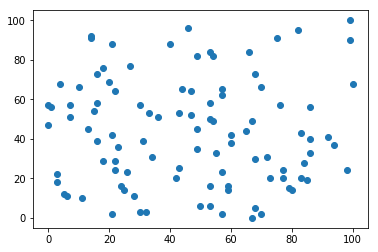

In [71]:
plt.scatter(X1,X2)

In [72]:
training_data = [[x1,x2] for x1,x2 in zip(X1,X2)]

In [75]:
cluster = KMeans(n_clusters=6,max_iter=500)

In [77]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
cluster.cluster_centers_

array([[22.09090909, 20.86363636],
       [88.5       , 42.7       ],
       [13.42105263, 65.57894737],
       [51.61111111, 50.44444444],
       [67.73684211, 14.89473684],
       [66.75      , 85.91666667]])

In [80]:
cluster.labels_

array([2, 2, 0, 3, 0, 0, 3, 2, 0, 0, 0, 2, 3, 4, 4, 4, 5, 0, 0, 2, 0, 3,
       2, 5, 4, 4, 5, 3, 3, 2, 0, 0, 5, 3, 1, 3, 4, 2, 0, 5, 0, 1, 0, 1,
       4, 2, 3, 5, 3, 2, 5, 0, 2, 4, 5, 3, 3, 0, 4, 0, 2, 1, 4, 3, 1, 3,
       1, 4, 4, 2, 4, 5, 3, 1, 4, 1, 3, 0, 2, 4, 2, 0, 5, 4, 0, 1, 2, 2,
       2, 5, 3, 3, 4, 5, 2, 0, 4, 4, 0, 1])

画图：

In [81]:
from collections import defaultdict

In [82]:
centers = defaultdict(list)

In [87]:
for label,location in zip(cluster.labels_,training_data):
    centers[label].append(location)

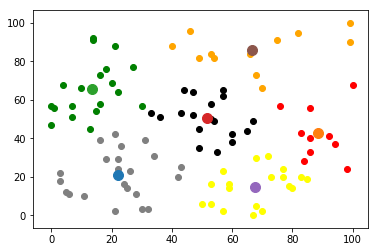

In [89]:
color = ['red','green', 'grey', 'black', 'yellow', 'orange']
for i,c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location,c=color[i])
for center in cluster.cluster_centers_:
    plt.scatter(*center,s=100)